In [1]:
import os, shutil, zipfile

local_zip = '/content/cats_and_dogs_small.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
original_db_dir = './train'
base_dir = '/cats_and_dogs_small'
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

FileExistsError: ignored

In [26]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [77]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import models
model = models.Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
from keras import optimizers
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [78]:
from keras import optimizers
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [15]:
validation_dir

'/cats_and_dogs_small/validation'

In [79]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(150,150),
  batch_size=20,
  class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
  validation_dir,
  target_size=(150,150),
  batch_size=20,
  class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [80]:
for data_batch, labels_batch in train_generator:
  print('배치 데이터 크기:', data_batch.shape)
  print('배치 레이블 크기:', labels_batch.shape)
  break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [21]:
history = model.fit_generator( # 배치 제너레이터를 사용하여 모델 훈련
  train_generator,
  steps_per_epoch=100,
  epochs=30,
  validation_data=validation_generator,
  validation_steps=50
)
model.save('cats_and_dogs_small_1.h5') # 모델 저장

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 108s 1s/step - loss: 0.6860 - acc: 0.5570 - val_loss: 0.6965 - val_acc: 0.4940
Epoch 2/30
100/100 [==============================] - 107s 1s/step - loss: 0.6537 - acc: 0.6145 - val_loss: 0.6774 - val_acc: 0.5490
Epoch 3/30
100/100 [==============================] - 107s 1s/step - loss: 0.5980 - acc: 0.6770 - val_loss: 0.5386 - val_acc: 0.7470
Epoch 4/30
100/100 [==============================] - 108s 1s/step - loss: 0.5535 - acc: 0.7145 - val_loss: 0.4938 - val_acc: 0.7920
Epoch 5/30
100/100 [==============================] - 108s 1s/step - loss: 0.5252 - acc: 0.7270 - val_loss: 0.6130 - val_acc: 0.6800
Epoch 6/30
100/100 [==============================] - 108s 1s/step - loss: 0.5052 - acc: 0.7400 - val_loss: 0.5098 - val_acc: 0.7660
Epoch 7/30
100/100 [==============================] - 108s 1s/step - loss: 0.4745 - acc: 0.7740 - val_loss: 0.5329 - val_acc: 0.7270
Epoch 8/30
100/100 [==============================] - 108s 1s/step - 

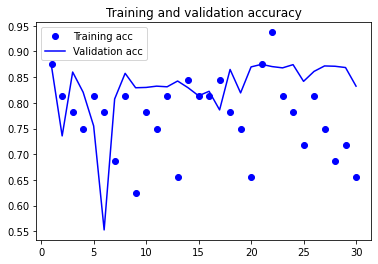

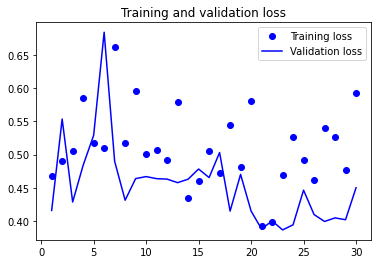

In [81]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [28]:
datagen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.1,
  horizontal_flip=True,
  fill_mode='nearest'
)

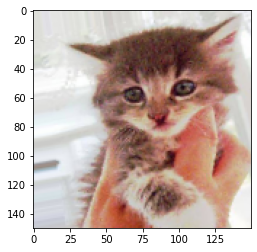

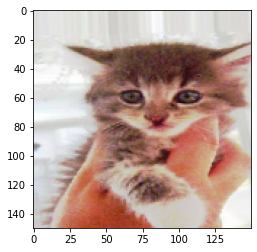

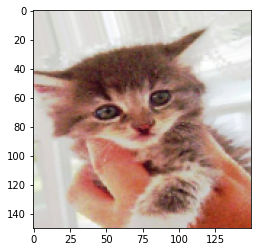

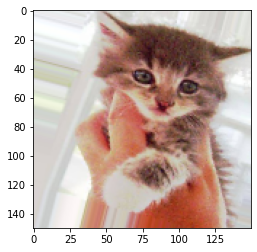

In [27]:
from keras.preprocessing import image
fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])
img_path = fnames[3] # 증식할 이미지 선택
img = image.load_img(img_path, target_size=(150,150)) # 이미지를 읽고 크기 변경
x = image.img_to_array(img) # (150,150,3) 크기의 numpy 배열로 변환
x = x.reshape((1,)+x.shape) # (1,150,150,3) 크기로 변환
i=0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i%4 == 0:
    break
plt.show()

In [29]:
model = models.Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [30]:
train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
)
test_datagen = ImageDataGenerator(rescale=1./255) # 검증 데이터는 증식되민 안됨
train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(150,150),
  batch_size=32,
  class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
  validation_dir,
  target_size=(150,150),
  batch_size=32,
  class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [35]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [36]:
history = model.fit_generator(
  train_generator,
  steps_per_epoch=len(train_generator)//train_generator.batch_size,
  epochs=300,
  validation_data=validation_generator,
  validation_steps=len(validation_generator)//validation_generator.batch_size
)
model.save('cats_and_dogs_small_2.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/300
1/1 [==============================] - 4s 4s/step - loss: 0.6903 - acc: 0.5625 - val_loss: 0.7006 - val_acc: 0.1562
Epoch 2/300
1/1 [==============================] - 2s 2s/step - loss: 0.6942 - acc: 0.4688 - val_loss: 0.8601 - val_acc: 0.0938
Epoch 3/300
1/1 [==============================] - 2s 2s/step - loss: 0.7303 - acc: 0.4375 - val_loss: 0.7033 - val_acc: 0.2812
Epoch 4/300
1/1 [==============================] - 2s 2s/step - loss: 0.6950 - acc: 0.5000 - val_loss: 0.6870 - val_acc: 0.7812
Epoch 5/300
1/1 [==============================] - 2s 2s/step - loss: 0.6910 - acc: 0.5000 - val_loss: 0.7048 - val_acc: 0.2500
Epoch 6/300
1/1 [==============================] - 2s 2s/step - loss: 0.6808 - acc: 0.6250 - val_loss: 0.7620 - val_acc: 0.2500
Epoch 7/300
1/1 [==============================] - 2s 2s/step - loss: 0.7087 - acc: 0.4375 - val_loss: 0.7261 - val_acc: 0.2500
Epoch 8/300
1/1 [==============================] - 2s 2s/step - loss: 0.6833 - acc: 0.5000 - val_loss: 0

In [37]:
from keras.applications.vgg16 import VGG16
conv_base = VGG16(
  weights='imagenet',
  include_top=False,
  input_shape=(150,150,3)
)
conv_base.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [42]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = '/content/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [43]:
def extract_features(dir, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
  dir,
  target_size = (150,150),
  batch_size = batch_size,
  class_mode = 'binary'
  )
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i*batch_size: (i+1)*batch_size] = features_batch
    labels[i*batch_size: (i+1)*batch_size] = labels_batch
    i += 1
    if i*batch_size >= sample_count:
     break
  return features, labels
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [44]:
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

In [47]:
from keras.layers import Dense, Dropout
from keras import models
from tensorflow.keras import optimizers
model = models.Sequential()
model.add(Dense(256, activation='relu', input_dim=4*4*512))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
  loss='binary_crossentropy',
  metrics=['acc']
)
history = model.fit(
  train_features,
  train_labels,
  epochs=30,
  batch_size=20,
  validation_data=(validation_features, validation_labels)
)
model.save('cats_and_dogs_small_3.h5')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/30
100/100 [==============================] - 3s 24ms/step - loss: 0.5921 - acc: 0.6780 - val_loss: 0.4258 - val_acc: 0.8640
Epoch 2/30
100/100 [==============================] - 2s 23ms/step - loss: 0.4244 - acc: 0.8175 - val_loss: 0.3122 - val_acc: 0.8950
Epoch 3/30
100/100 [==============================] - 2s 23ms/step - loss: 0.3469 - acc: 0.8555 - val_loss: 0.2986 - val_acc: 0.9000
Epoch 4/30
100/100 [==============================] - 2s 23ms/step - loss: 0.3102 - acc: 0.8630 - val_loss: 0.3071 - val_acc: 0.8850
Epoch 5/30
100/100 [==============================] - 2s 24ms/step - loss: 0.2831 - acc: 0.8835 - val_loss: 0.2810 - val_acc: 0.8970
Epoch 6/30
100/100 [==============================] - 2s 23ms/step - loss: 0.2700 - acc: 0.8890 - val_loss: 0.2450 - val_acc: 0.9110
Epoch 7/30
100/100 [==============================] - 2s 23ms/step - loss: 0.2485 - acc: 0.9055 - val_loss: 0.2307 - val_acc: 0.9200
Epoch 8/30
100/100 [==============================] - 2s 23ms/step - 

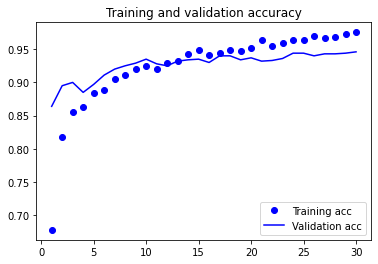

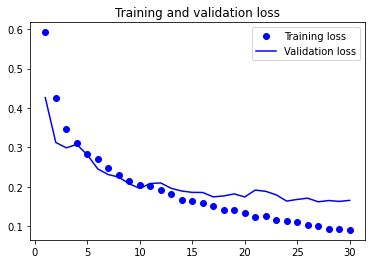

In [49]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [48]:
from keras import models
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = models.Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [51]:
print('conv_base를 동경하기 전 훈련되는 가중치의 수: ', len(model.trainable_weights))
conv_base.trainable = False
print('conv_base를 동경한 후 훈련되는 가중치의 수: ', len(model.trainable_weights))

conv_base를 동경하기 전 훈련되는 가중치의 수:  30
conv_base를 동경한 후 훈련되는 가중치의 수:  4


In [52]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest',
  )
test_datagen = ImageDataGenerator(rescale=1./255) # 검증 데이터는 증식되면 안됨
train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(150,150),
  batch_size=32,
  class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [57]:
from tensorflow.keras import optimizers
validation_generator = test_datagen.flow_from_directory(
  validation_dir,
  target_size=(150,150),
  batch_size=32,
  class_mode='binary'
)
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])
history = model.fit_generator(
  train_generator,
  steps_per_epoch=len(train_generator)//train_generator.batch_size,
  epochs=30,
  validation_data=validation_generator,
  validation_steps=len(validation_generator)//validation_generator.batch_size,
  verbose=2,
)
model.save('cats_and_dogs_small_5.h5')

Found 2000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
1/1 - 353s - loss: 0.4677 - acc: 0.8750 - val_loss: 0.4162 - val_acc: 0.8694
Epoch 2/30
1/1 - 352s - loss: 0.4909 - acc: 0.8125 - val_loss: 0.5535 - val_acc: 0.7356
Epoch 3/30
1/1 - 352s - loss: 0.5054 - acc: 0.7812 - val_loss: 0.4288 - val_acc: 0.8600
Epoch 4/30
1/1 - 352s - loss: 0.5848 - acc: 0.7500 - val_loss: 0.4840 - val_acc: 0.8206
Epoch 5/30
1/1 - 352s - loss: 0.5172 - acc: 0.8125 - val_loss: 0.5290 - val_acc: 0.7550
Epoch 6/30
1/1 - 352s - loss: 0.5103 - acc: 0.7812 - val_loss: 0.6838 - val_acc: 0.5525
Epoch 7/30
1/1 - 352s - loss: 0.6610 - acc: 0.6875 - val_loss: 0.4900 - val_acc: 0.8075
Epoch 8/30
1/1 - 352s - loss: 0.5170 - acc: 0.8125 - val_loss: 0.4315 - val_acc: 0.8575
Epoch 9/30
1/1 - 353s - loss: 0.5951 - acc: 0.6250 - val_loss: 0.4640 - val_acc: 0.8294
Epoch 10/30
1/1 - 352s - loss: 0.5014 - acc: 0.7812 - val_loss: 0.4670 - val_acc: 0.8300
Epoch 11/30
1/1 - 352s - loss: 0.5075 - acc: 0.7500 - val_loss: 0.4639 - val_acc: 0.8325
Epoch 12/30
1/1 - 352s - loss:

In [82]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
   set_trainable = True
  if set_trainable:
   layer.trainable = True
  else:
   layer.trainable = False

model.compile(
  loss='binary_crossentropy',
  optimizer=optimizers.RMSprop(lr=1e-5),
  metrics=['acc']
)

history = model.fit_generator(
  train_generator,
  steps_per_epochs=train_generator.n//train_generator.batch_size,
  epochs=100,
  validation_data=validation_generator,
  validation_steps=validation_generator.n//validation_generator.batch_size
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


TypeError: ignored

In [67]:
train_generator.n//train_generator.batch_size

62

In [ ]:
validation_generator.n//validation_generator.batch_size

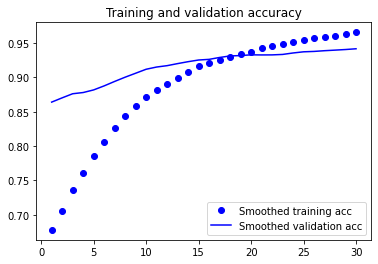

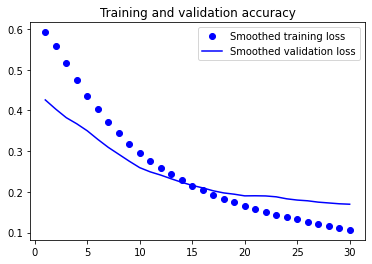

In [72]:
def smooth_curve(points, factor=0.8):
  smoothed_points=[]
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous*factor+point*(1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [76]:
test_generator = test_datagen.flow_from_directory(
  test_dir,
  target_size=(150,150),
  batch_size=20,
  class_mode='binary'
)
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


test acc: 0.8309999704360962
